# Zadanie 1 - aktywnosc slonca

Plik spots.txt zawiera wartości aktywności Słońca w kolejnych miesiącach. Wykreśl ten sygnał oraz jego spektrum. Za pomocą FFT, oblicz częstotliwość cyklu aktywności słonecznej.  Przydatne mogą być następujące konstrukcje:

array = genfromtxt(‘spots.txt’)  (lub array=[float(x) for x in open('spots.txt').read().split()])

x = max(array)

7.90036379976
19
7.90036379976
11.149122807017545 lat


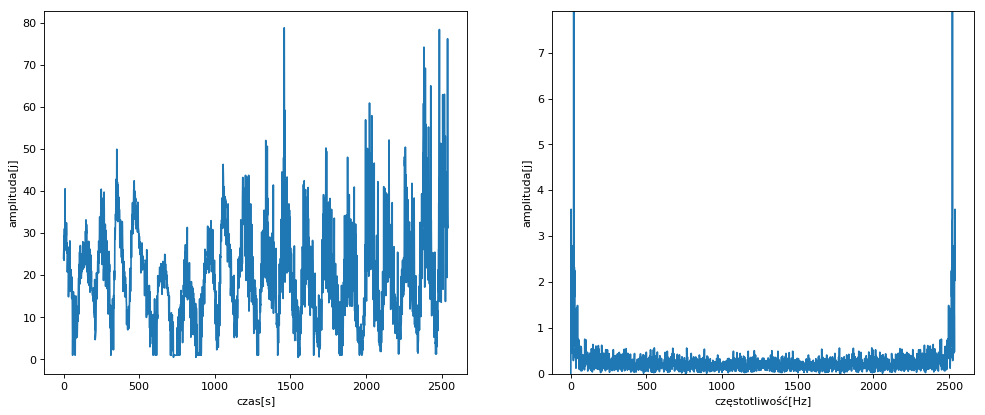

In [1]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

array=[float(x) for x in open('spots.txt').read().split()]
x = max(array)
x
w=1*12


n = len(array)

fig = plt.figure(figsize=(15, 6), dpi=80)   
ax = fig.add_subplot(121)
## --- POMOCNICZY SYGNAL
indices = range(len(array))
## --- 
ax.set_ylabel("amplituda[j]")
ax.set_xlabel("czas[s]")
ax.plot(indices,array)

signal1 = fft(array)
    # sygnal w dziedzinie czestotliwosci 
signal1 = abs(signal1)    
signal1 = [s/(0.5*n) for s in signal1]
    # modul sygnalu
signal1[0] = 0

ma = max(signal1)
print(ma)

index = 0
for i in range(len(signal1)):
    if (signal1[i]== ma):
        index = i
        break
print(index)
print(signal1[index])

print(1/(index/len(array)*w),"lat")
        
freqs = range(int(n))
freqs = [fq/n*w for fq in freqs]

ax = fig.add_subplot(122)
ymax = max(signal1)
if (ymax > 3.0):
    ax.set_ylim([0.0,ymax])
else:
    ax.set_ylim([0.0,3.0])
#ax.set_xlim([0,w])
ax.set_xlabel("częstotliwość[Hz]")
ax.set_ylabel("amplituda[j]")
   
ax.plot(signal1)

show()

# Zadanie 2 - proste filtrowanie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Za pomocą FFT, przekształć sygnał do dziedziny częstotliwości. Następnie usuń składowe o częstotliwości 2Hz. Tak zmodyfikowany sygnał przekształć do dziedziny czasu i wykreśl go.

/usr/local/lib/python3.5/dist-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


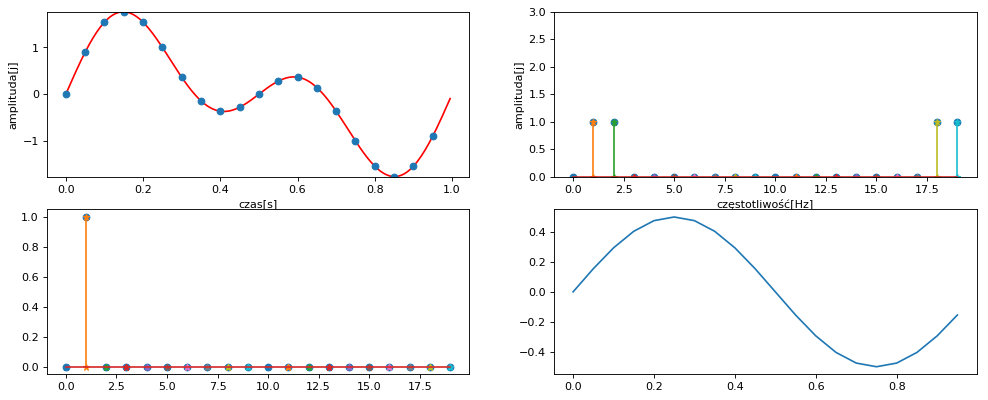

In [5]:
from __future__ import division
from pylab import *
from numpy import *
from scipy import *
from ipywidgets import *
import math as mt

%matplotlib inline

def draw(A = 1, LP = 1, w = 20, f = 1.0):

    #A = 1
    # Amplituda sygnału

    #LP = 1 
    # Liczba analizowanych pełnych przebiegów sygnału (okresów)
    #w = 40           
    # czśstotliwość probkowania [Hz] sygnału 
    #(jak często w ciągu sekundy pobieramy informacje o wartości sygnału)

    #f = 2.0           
    # Czestotliwosc sygnalu [Hz]

    T = 1.0/f        
    # Okres sygnalu [s] (jak długo trwa jeden przebieg sinusa)

    TW = 1.0/w        
    # Okres probkowania [s] (co ile sekund pobieramy próbkę)

    t = np.arange(0, LP*T, TW)
    # generujemy momenty, w których pobieramy próbki

    n = len(t)

    FUNC = lambda t : A*(sin(2*pi*t*f)+sin(4*pi*t*f))   
    
    # def. funkcji (tutaj sinus)

    signal = FUNC(t)                 
    # funkcja sprobkowana

    fig = plt.figure(figsize=(15, 6), dpi=80)   
    ax = fig.add_subplot(221)
    ## --- POMOCNICZY SYGNAL
    base_t = np.arange(0, LP*T, 1.0/200.0)
    base_signal = FUNC(base_t)
    ax.plot(base_t, base_signal, linestyle='-', color='red')
    ax.set_ylim([min(base_signal), max(base_signal)])
    ## --- 
    ax.set_ylabel("amplituda[j]")
    ax.set_xlabel("czas[s]")
    ax.plot(t, signal, 'o')

    signal1 = fft(signal)
    signal2 = signal1
    # sygnal w dziedzinie czestotliwosci 
    signal1 = abs(signal1)    
    signal1 = [s/(0.5*n) for s in signal1]
    # modul sygnalu    
    
    freqs = range(int(n))
    freqs = [fq/n*w for fq in freqs]
    
    ax = fig.add_subplot(222)
    ymax = max(signal1)
    if (ymax > 3.0):
        ax.set_ylim([0.0,ymax])
    else:
        ax.set_ylim([0.0,3.0])
    #ax.set_xlim([0,w])
    ax.set_xlabel("częstotliwość[Hz]")
    ax.set_ylabel("amplituda[j]")
    
    stem(freqs, signal1, '-*')
    
    mark = False
    for i in range(n):
        if i/n*w == 2 or mark:
            signal2[i] = 0
            signal1[i] = 0
            mark = True
    
    ax = fig.add_subplot(223)
    stem(freqs,signal1, '-*')


    ax = fig.add_subplot(224)
    ax.plot(t,ifft(signal2),'-')
    
    show()
    
    
draw()    


# Zadanie 3 - Informacja o fazie

Wykreśl sygnał $sin(2*pi*t) + sin(4*pi*t)$, T=1s, w=20Hz. Tym razem oprócz spektrum, wykreśl wykres z informacją o fazie poszczególnych częstotliwości (faza = arg(z)), gdzie z=a+bi. To samo wykonaj dla sin(2*pi*t) + cos(4*pi*t). Porównaj otrzymane wykresy. Przydatna może być funkcja angle (z parametrem deg=True)

<Container object of 3 artists>

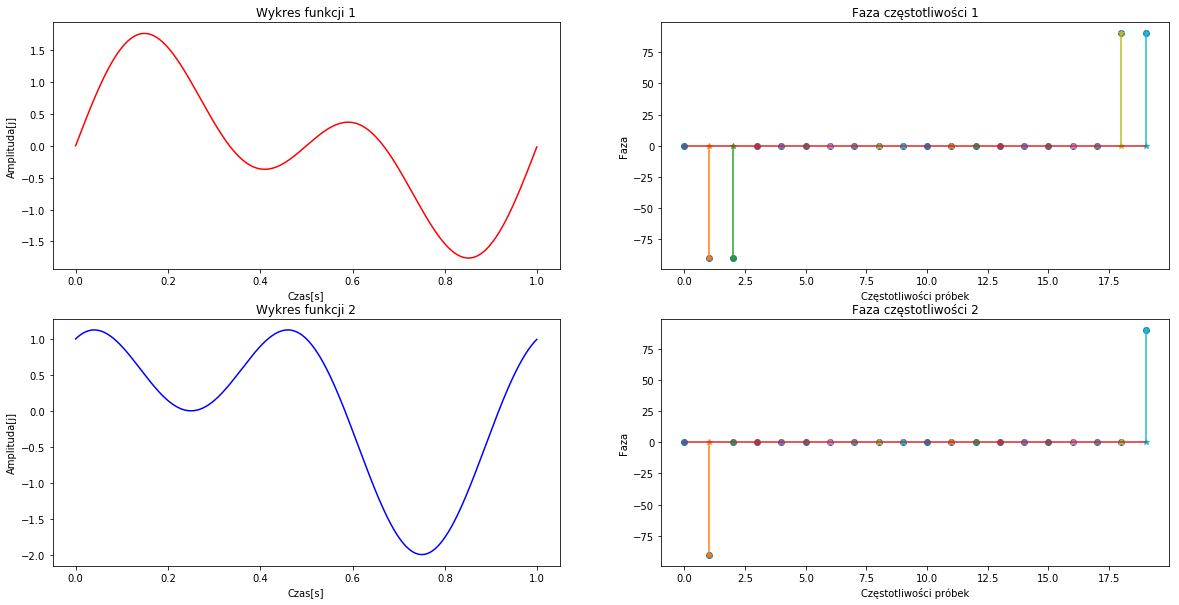

In [7]:
step = 0.001
LP = 1
T = 1
w = 20

#SYGNAL FUNKCJI 1
funSig = lambda t : sin(2*pi*t) + sin(4*pi*t)

#first plot
axisTime = np.arange(0,LP*T,step)
axisAmpl = funSig(axisTime)
#second plot
axisProb = np.arange(0,LP*T, 1/w)
signal = funSig(axisProb)
fftSignal = fft(signal)
freq = range(len(axisProb))
freq = [s/(len(axisProb))*w for s in freq]
phase = np.angle(fftSignal, deg=True)
fftAbs = np.abs(fftSignal) * 2/len(axisProb)
fftAbs[0]/=2
phase[fftAbs[:]<0.001]=0

#SYGNAL FUNKCJI 2
funSig = lambda t : sin(2*pi*t) + cos(4*pi*t)
#first plot
axisTime2 = np.arange(0,LP*T,step)
axisAmpl2 = funSig(axisTime2)
#second plot
axisProb2 = np.arange(0,LP*T, 1/w)
signal2 = funSig(axisProb2)
fftSignal2 = fft(signal2)
freq2 = range(len(axisProb2))
freq2 = [s/(len(axisProb2))*w for s in freq2]
phase2 = np.angle(fftSignal2, deg=True)
fftAbs2 = np.abs(fftSignal2) * 2 / (len(axisProb2))
fftAbs2 = np.abs(fftSignal2) * 2/len(axisProb2)
fftAbs2[0]/=2
phase2[fftAbs2[:]<0.001]=0

#RYSOWANIE
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
ax.set_title("Wykres funkcji 1")
ax.set_xlabel("Czas[s]")
ax.set_ylabel("Amplituda[j]")
ax.plot(axisTime,axisAmpl,color='red')
ax = fig.add_subplot(222)
ax.set_title("Faza częstotliwości 1")
ax.set_xlabel("Częstotliwości próbek")
ax.set_ylabel("Faza")
stem(freq, phase, '-*')
ax = fig.add_subplot(223)
ax.set_title("Wykres funkcji 2")
ax.set_xlabel("Czas[s]")
ax.set_ylabel("Amplituda[j]")
ax.plot(axisTime2,axisAmpl2, color = 'blue')
ax = fig.add_subplot(224)
ax.set_title("Faza częstotliwości 2")
ax.set_xlabel("Częstotliwości próbek")
ax.set_ylabel("Faza")
stem(freq2,phase2, '-*')


#1 -> fft obrabia cosinusy więc oba sygnały (różne częstotliwości) jest przesunięty w fazie o -90 stopni
#2 -> w tym przypadku tylko 1 sygnał jest przesunięty w fazie o -90 stopni


# Zadanie 4 - plik wejsciowy audio

Wczytaj plik err.wav. Wykreśl jego spektrum. Spróbuj także skali logarytmicznej. Określ dominujące w sygnale częstotliwości. Przydatne:

import scipy.io.wavfile

w, signal = scipy.io.wavfile.read('err.wav')

signal = [s[0] for s in signal]   #Tylko pierwszy kanał

yscale(‘log’)

spectrum[::10]        # co 10-ty element


Dominujące częstotliwości to : [ 4728.67132867  4831.46853147  4934.26573427  5037.06293706  8018.18181818]


<Container object of 3 artists>

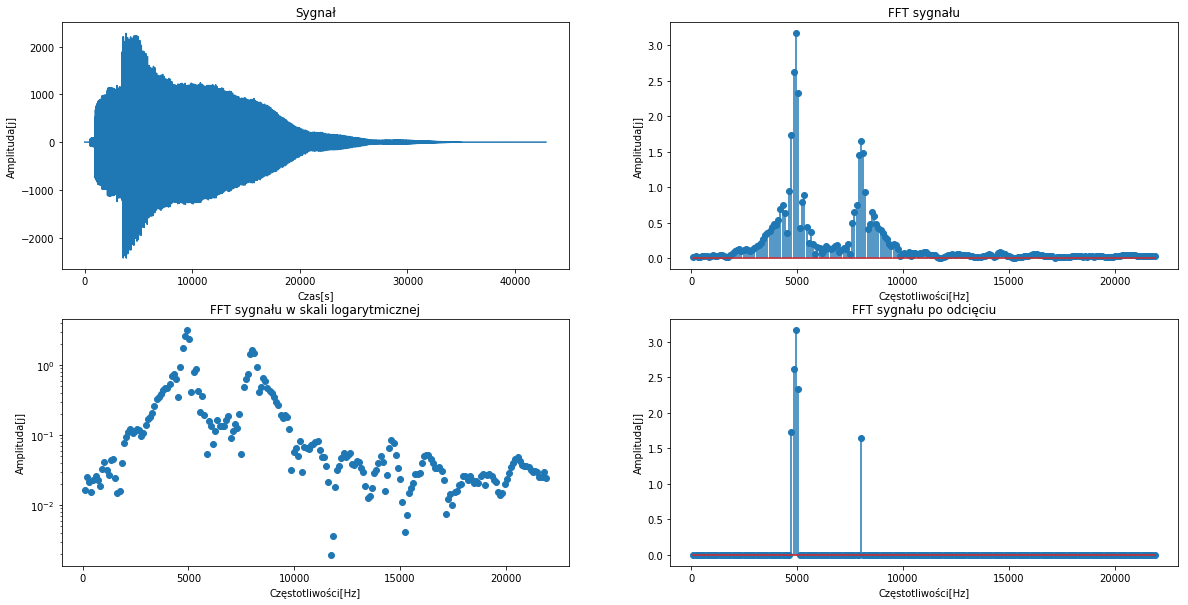

In [48]:
import scipy.io.wavfile

bitrate, signal = scipy.io.wavfile.read('err.wav')
signal = [s[0] for s in signal]

w = 100
spectrum = signal[::w]#co w-ty element

fftSpectrum = fft(spectrum)
firstHalf = fftSpectrum[1:int(len(fftSpectrum)/2)]
firstAmpl = abs(firstHalf)*2/len(signal)
firstAmpl[0] /=2
maxAmpl = max(firstAmpl)
thresh = 0.5
thresholdAmpl = maxAmpl * thresh#0.7 za duży próg w wykresie są 2 dominujące grupy czestotliwości
firstAmplWithThresh = firstAmpl.copy()
firstAmplWithThresh[firstAmpl[:] <= thresholdAmpl] = 0
#HZ
freq = np.fft.fftfreq(len(fftSpectrum))
freqHz = abs(freq *bitrate)
freqHz = freqHz[1:int(len(fftSpectrum)/2)]
freqHz0 = freqHz.copy()
freqHz0[firstAmplWithThresh[:] == 0]=0

freqDominion = freqHz0[freqHz0[:]!=0]

print("Dominujące częstotliwości to :", freqDominion)

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(221)
ax.set_title("Sygnał")
ax.set_xlabel("Czas[s]")
ax.set_ylabel("Amplituda[j]")
ax.plot(signal)
ax = fig.add_subplot(222)
ax.set_title("FFT sygnału")
ax.set_xlabel("Częstotliwości[Hz]")
ax.set_ylabel("Amplituda[j]")
stem(freqHz, firstAmpl)
ax = fig.add_subplot(223)
ax.set_title("FFT sygnału w skali logarytmicznej")
ax.set_xlabel("Częstotliwości[Hz]")
ax.set_ylabel("Amplituda[j]")
ax.set_yscale('log')
stem(freqHz, firstAmpl)
ax = fig.add_subplot(224)
ax.set_title("FFT sygnału po odcięciu")
ax.set_xlabel("Częstotliwości[Hz]")
ax.set_ylabel("Amplituda[j]")
stem(freqHz,firstAmplWithThresh)